# Data Analysis

For understanding the bibliographic catalogue data of the Swissbib platform, the project team has generated a sample .json file with a big amount of representative records. This chapter shows the analysis of this data delivery.

## Table of Contents

- [Sample Records Analysis](#Sample-Records-Analysis)
    - [Book](#Book)
    - [Music](#Music)
    - [Video Material](#Video-Material)
    - [Map](#Map)
    - [Periodical](#Periodical)
    - [Collection](#Collection)
    - [Computer File](#Computer-File)
- [General Observation](#General-Observation)
- [Attribute Analysis](#Attribute-Analysis)
    - [Table of Contents of Attribute Analysis](#Table-of-Contents-of-Attribute-Analysis)
- [Metadata Handover](#Metadata-Handover)
- [Summary](#Summary)

## Sample Records Analysis

In this section, the data file is loaded and some sample data records are shown.

In [1]:
import os
import json

records = []
path_data = './data'
path_goldstandard = './daten_goldstandard'

for line in open(os.path.join(path_data, 'job7r4A1.json'), 'r'):
    records.append(json.loads(line))

print('Number of data records loaded', len(records))

Number of data records loaded 183407


In [2]:
import pandas as pd

# Generate Pandas DataFrame object out of the raw data
df = pd.DataFrame(records)

# Extend display to number of columns of DataFrame
pd.options.display.max_columns = len(df.columns)

df.head()

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,edition,part,pages,volumes,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '245c': ['André S...",{},1992,1992,1992,1992,,[],[S. 102-114],[S. 102-114],[],[],,[],[],[],,[BK020000]
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '245c': ['von Werne...",{},1986,1986,1986,1986,,[],[43 S.],[43 S.],[],[],,[],[],[],,[BK020000]
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...",{},1923,1923,1923,1923,,[],[75 p.],[75 p.],[],[],,[],[],[],,[BK020000]
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '245c': ['']}",{},1947,1947,1947,1947,,[],[24 S.],[24 S.],[],[],,[],[],[],,[BK020000]
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '245c': ['Urs Oberlin ...",{},1991,1991,1991,1991,,[],[p. 14-15],[p. 14-15],[],[],,[],[],[],,[BK020000]


In [3]:
print('Number of records {:d}, number of attributes per record {:d}.\n'.format(
    len(df), len(df.columns)))

df.info()

Number of records 183407, number of attributes per record 23.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183407 entries, 0 to 183406
Data columns (total 23 columns):
docid         183407 non-null object
035liste      183407 non-null object
isbn          183407 non-null object
ttlfull       183407 non-null object
ttlpart       183407 non-null object
person        183407 non-null object
corporate     183407 non-null object
pubyear       183407 non-null object
decade        183407 non-null object
century       183407 non-null object
exactDate     183407 non-null object
edition       183407 non-null object
part          183407 non-null object
pages         183407 non-null object
volumes       183407 non-null object
pubinit       183407 non-null object
pubword       183407 non-null object
scale         183407 non-null object
coordinate    183407 non-null object
doi           183407 non-null object
ismn          183407 non-null object
musicid       183407 non-null object
format      

Swissbib data describes different kinds of bibliographic units, see [format](#format). The following subsections show some sample data for such units. The format is interpreted roughly in these subsections, compare Swissbib's [format codes](http://www.swissbib.org/wiki/index.php?title=Filtering#format_codes) [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [4]:
df.format.str[0].str[:2].unique()

array(['BK', 'MU', 'VM', 'MP', 'CR', 'CL', 'CF', nan], dtype=object)

### Book

A format code starting with $\texttt{BK}$ stands for a bibliographic unit of a book or an article. A sample record is shown below.

In [5]:
df.loc[df[df.format.str[0].str[:2]=='BK'].index[0]]

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '245c': ['André S...
corporate                                                    {}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 102-114]
volumes                                            [S. 102-114]
pubinit                                 

### Music

A format code starting with $\texttt{MU}$ stands for a bibliographic unit that is related to music. A sample record is shown below.

In [6]:
df.loc[df[df.format.str[0].str[:2]=='MU'].index[0]]

docid                                                 554098806
035liste                  [(OCoLC)1085495414, (IDSBB)007052696]
isbn                                                         []
ttlfull                             {'245': ['Violin sonatas']}
ttlpart                             {'245': ['Violin sonatas']}
person        {'100': ['BrahmsJohannes1833-1897(DE-588)11851...
corporate                                                    {}
pubyear                                                20182018
decade                                                     2018
century                                                    2018
exactDate                                              20182018
edition                                                        
part                                                         []
pages                                            [1 CD (69:42)]
volumes                                          [1 CD (69:42)]
pubinit                                 

### Video Material

A format code starting with $\texttt{VM}$ represents some film material. A sample record is shown below.

In [7]:
df.loc[df[df.format.str[0].str[:2]=='VM'].index[0]]

docid                                                 554098911
035liste      [(OCoLC)1065768412, (IDSBB)007052702, (OCoLC)1...
isbn                         [978-3-946274-20-9, 3-946274-20-X]
ttlfull       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
ttlpart       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
person        {'100': [], '700': ['SchlingensiefChristoph196...
corporate                                                    {}
pubyear                                                20182008
decade                                                     2018
century                                                    2018
exactDate                                              20182008
edition                                                        
part                                                     [2004]
pages                                  [2 DVD-Videos (283 min)]
volumes                                [2 DVD-Videos (283 min)]
pubinit                                 

### Map

A format code starting with $\texttt{MP}$ is a map. A sample record is shown below.

In [8]:
df.loc[df[df.format.str[0].str[:2]=='MP'].index[0]]

docid                                                 554099039
035liste                  [(OCoLC)1085495396, (IDSBB)007052708]
isbn                                                         []
ttlfull       {'245': ['Nova descriptio Comitatus Hollandiæ'...
ttlpart       {'245': ['Nova descriptio Comitatus Hollandiæ'...
person        {'100': ['BlaeuWillem Janszoon1571-1638(DE-588...
corporate                                                    {}
pubyear                                                19931604
decade                                                     1993
century                                                    1993
exactDate                                              19931604
edition                                               Facsimile
part                                                         []
pages                                                 [1 Karte]
volumes                                               [1 Karte]
pubinit                                 

### Periodical

A format code starting with $\texttt{CR}$ is a bibliographic unit of a periodical. A sample record is shown below.

In [9]:
df.loc[df[df.format.str[0].str[:2]=='CR'].index[0]]

docid                                                 55409939X
035liste                   [(OCoLC)699516877, (IDSBB)007052728]
isbn                                                [1533-4406]
ttlfull       {'245': ['The new England journal of medicine ...
ttlpart       {'245': ['The new England journal of medicine ...
person                                {'100': [], '245c': ['']}
corporate                                                    {}
pubyear                                                18121826
decade                                                     1812
century                                                    1812
exactDate                                              18121826
edition                                                        
part                                                         []
pages                                        [Online-Ressource]
volumes                                      [Online-Ressource]
pubinit                                 

### Collection

A format code starting with $\texttt{CL}$ is a collection. A sample record is shown below.

In [10]:
df.loc[df[df.format.str[0].str[:2]=='CL'].index[0]]

docid                                                 554101610
035liste                  [(OCoLC)1085510940, (IDSBB)007052979]
isbn                                                         []
ttlfull       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
ttlpart       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
person                                {'100': [], '245c': ['']}
corporate               {'110': ['St. Gallischer Hilfsverein']}
pubyear                                                20179999
decade                                                     2017
century                                                    2017
exactDate                                              20179999
edition                                                        
part                                                         []
pages                                                 [1 Mappe]
volumes                                               [1 Mappe]
pubinit                                 

### Computer File

A format code starting with $\texttt{CF}$ is a placeholder for a computer file on any kind of storage. A sample record is shown below.

In [11]:
df.loc[df[df.format.str[0].str[:2]=='CF'].index[0]]

docid                                                 554144301
035liste                   [(IDSBB)007008154, (RERO)R007245313]
isbn                                                         []
ttlfull       {'245': ['Ice Age 4', 'voll verschoben : die a...
ttlpart       {'245': ['Ice Age 4', 'voll verschoben : die a...
person                                {'100': [], '245c': ['']}
corporate                                                    {}
pubyear                                                2012    
decade                                                     2012
century                                                    2012
exactDate                                              2012    
edition                                                        
part                                                         []
pages                                         [1 Speicherkarte]
volumes                                       [1 Speicherkarte]
pubinit                                 

## General Observation

As can be observed in the sample records displayed above, the attributes of the records are stored in basic Python datatypes like strings, lists (of strings), and dictionaries. A look into the raw data file confirms this observation.

In [12]:
! head -n 2 ./data/job7r4A1.json

{"docid":"554061449","035liste":["(OCoLC)1085491204","(IDSBB)006899773"],"isbn":[],"ttlfull":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"ttlpart":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"person":{"100":["SchluchterAndré"],"245c":["André Schluchter"]},"corporate":{},"pubyear":"1992    ","decade":"1992","century":"1992","exactDate":"1992    ","edition":"","part":[],"pages":["S. 102-114"],"volumes":["S. 102-114"],"pubinit":[],"pubword":[],"scale":"","coordinate":[],"doi":[],"ismn":[],"musicid":"","format":["BK020000"]}
{"docid":"554061481","035liste":["(OCoLC)1085491341","(IDSBB)006899983"],"isbn":[],"ttlfull":{"245":["Reimereien"]},"ttlpart":{"245":["Reimereien"]},"person":{"100":["NaegeliWerner"],"245c":["von Werner Naegeli"]},"corporate":{},"pubyear":"1986    ","decade":"1986","century":"1986","exactDate":"1986    ","edition":"","part":[],"pag

A specific analysis on each attribute, its meaning and contents will be done as a next step. For the upcoming analysis, each attribute of the data records is assigned to its specific group type. This is done with the help of a global dictionary variable $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$.

In [13]:
columns_metadata_dict = {}

## Attribute Analysis

This section analyses the attributes provided by the Swissbib data extracts. The extracted data is used as a basis for the machine learning models in the capstone project. The attributes are based on the MARC 21 Format for Bibliographic Data [[MARC](./A_References.ipynb#marc21)] and are documented on a Swissbib wikipedia page [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [14]:
df.columns

Index(['docid', '035liste', 'isbn', 'ttlfull', 'ttlpart', 'person',
       'corporate', 'pubyear', 'decade', 'century', 'exactDate', 'edition',
       'part', 'pages', 'volumes', 'pubinit', 'pubword', 'scale', 'coordinate',
       'doi', 'ismn', 'musicid', 'format'],
      dtype='object')

This section provides and uses some functions that have been written for supporting the analysis of the attributes as well as for data preprocessing in the upcoming chapters. These functions have been defined in separate code files.

- [data_analysis_funcs.py](./data_analysis_funcs.py)
- [data_preparation_funcs.py](./data_preparation_funcs.py)

In [15]:
import data_analysis_funcs as daf
import data_preparation_funcs as dpf

### Table of Contents of Attribute Analysis

- [035liste](#035liste)
- [century](#century)
- [coordinate](#coordinate)
- [corporate](#corporate)
- [decade](#decade)
- [docid](#docid)
- [doi](#doi)
- [edition](#edition)
- [exactDate](#exactDate)
- [format](#format)
- [isbn](#isbn)
- [ismn](#ismn)
- [musicid](#musicid)
- [pages](#pages)
- [part](#part)
- [person](#person)
- [pubinit](#pubinit)
- [pubword](#pubword)
- [pubyear](#pubyear)
- [scale](#scale)
- [ttlfull](#ttlfull)
- [ttlpart](#ttlpart)
- [volumes](#volumes)

### 035liste

In [16]:
columns_metadata_dict['list_columns'] = ['035liste']

Attribute $\texttt{035liste}$ holds a list of identifiers from the originating library of a bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Each record of the Swissbib data holds at least one identifier. Some examples are shown below.

In [17]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, '035liste')

Number of records with filled 035liste 183407, with missing 035liste 0 => 100.0%


In [18]:
df['035liste'].apply(lambda x : len(x)).sort_values().head(5)

83463     1
150669    1
150668    1
150667    1
150666    1
Name: 035liste, dtype: int64

In [19]:
df['035liste'].apply(lambda x : len(x)).sort_values().tail(10)

144185    20
54084     21
30793     21
136608    21
61603     21
14755     21
49974     22
139972    22
139191    23
124359    23
Name: 035liste, dtype: int64

In [20]:
print('Some sample identifiers:')
df['035liste'].sample(n=10)

Some sample identifiers:


63693     [(OCoLC)879331196, (IDSBB)007059510, (OCoLC)87...
19250     [(OCoLC)1048383938, (SGBN)001445646, (OCoLC)10...
101595                [(OCoLC)1086358535, (NEBIS)011340230]
159623                                         [(CEO)22619]
18620                                    [(RERO)R008885536]
65647                  [(OCoLC)315598042, (IDSBB)004797698]
30952     [(IDSBB)003754324, (SNL)991011487699703976, (S...
168992                                        [(CEO)165307]
88622        [(SERSOL)ssib034519000, (WaSeSS)ssib034519000]
37802        [(SERSOL)ssj0002060974, (WaSeSS)ssj0002060974]
Name: 035liste, dtype: object

Attribute $\texttt{035liste}$ is the central attribute for finding duplicates in the training data of the Swissbib's goldstandard. This process will be explained and implemented in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### century

In [21]:
columns_metadata_dict['strings_columns'] = ['century']

In [22]:
idx_century_filled, idx_century_empty = daf.find_empty_in_column(df, columns_metadata_dict, 'century')

daf.two_examples(df, idx_century_filled, idx_century_empty)

Number of records with filled century 183407, with missing century 0 => 100.0%

EMPTY - None

FILLED - index 0 

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '245c': ['André S...
corporate                                                    {}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 

Attribute $\texttt{century}$ holds information on the year of origin of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute holds strings of length 4 that can predominantly be interpreted as year-dates. Some examples and the top-most quantity distribution are shown below.

In [23]:
df['century'].sample(n=15)

128314    2018
157016    1928
137624    2000
118923    uuuu
108061    1995
49281     2008
83323     2018
70764     2018
74338     1989
176942    2011
29491     2019
89644     2019
149818    1993
97830     2017
110379    2019
Name: century, dtype: object

In [24]:
df.century.value_counts(normalize=True).head(10)

2018    0.208389
2019    0.086785
2017    0.046350
uuuu    0.036236
2016    0.025223
1999    0.020201
2015    0.019879
2014    0.018156
2012    0.016286
2013    0.015616
Name: century, dtype: float64

If the year-date is unclear to some extent or no year-date of the unit is registered, letter 'u' is used as a placeholder of the unknown digit.

In [25]:
df.century[df.century.str.contains('u')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The above statement results in the same array like the following regular expression.

In [26]:
df.century[df.century.str.contains('[^0-9]')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

In [27]:
df.century[~df.century.str.contains('[u]')].unique()

array(['1992', '1986', '1923', '1947', '1991', '1967', '1950', '1985',
       '1983', '1942', '1883', '1990', '1984', '1989', '1993', '1961',
       '1940', '1981', '1988', '1858', '1978', '1977', '1880', '1945',
       '1963', '1912', '1884', '1937', '1956', '1943', '1916', '1960',
       '1980', '1936', '1906', '1987', '1955', '1944', '1953', '1930',
       '1903', '1913', '1938', '1895', '1905', '1920', '1918', '1857',
       '1928', '1881', '1932', '1900', '1924', '1915', '1931', '1927',
       '1919', '1896', '1922', '1871', '1926', '1939', '1907', '1776',
       '1873', '1893', '1968', '1975', '1946', '1833', '1855', '1949',
       '1962', '1971', '1959', '1966', '1862', '1898', '1901', '1904',
       '1902', '1951', '1909', '1929', '1921', '1882', '1964', '1911',
       '1957', '1897', '1910', '1867', '1914', '1908', '1958', '1934',
       '1933', '1872', '1845', '1979', '1954', '1885', '1810', '1891',
       '1869', '1876', '1889', '1836', '1952', '1935', '1948', '1917',
      

The following graph shows the publishing activity of Western European literature.

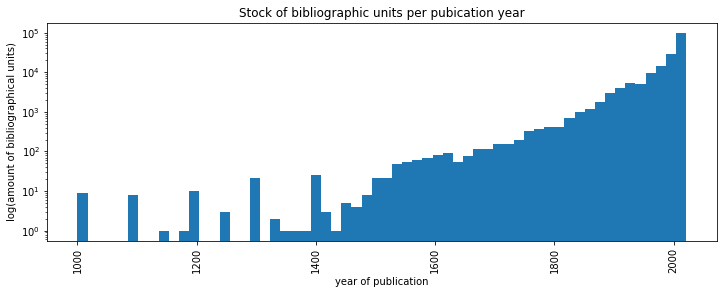

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

plt.hist(df.century[~df.century.str.contains('[u]')].astype(int), bins=60, log=True)
plt.xticks(rotation='vertical')
plt.title('Stock of bibliographic units per pubication year')
plt.xlabel('year of publication')
plt.ylabel('log(amount of bibliographical units)')
plt.show()

The attribute is taken over to the feature matrix without an extra processing in [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [29]:
columns_metadata_dict['data_analysis_columns'] = ['century']

### coordinate

In [30]:
columns_metadata_dict['list_columns'] = ['coordinate']

Attribute $\texttt{coordinate}$ holds geographical coordinate information on the related bibliographical unit of format map.

In [31]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 730, with missing coordinate 182677 => 0.4%


In [32]:
_, _ = daf.find_empty_in_column(df[df.format.str[0].str[:2]=='MP'], columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 729, with missing coordinate 183 => 79.9%


In [33]:
df['coordinate'][df.format.str[0].str[:2]=='MP'].sample(n=10)

114789    [E0062617, N0465337]
27734     [E0094805, N0463034]
105477    [E0173051, N0511140]
113766    [E0091209, N0471227]
59699     [E0222400, N0370100]
111774    [E0093047, N0463315]
114861    [E0060601, N0463715]
113767    [E0090507, N0470919]
20507     [W1800000, N0900000]
23503                       []
Name: coordinate, dtype: object

The attribute stores its values in the form of a list. The list may hold more than two specific coordinate values. A specific coordinate value is mostly of length 8 characters.

In [34]:
df_maps = df.loc[df.coordinate.apply(lambda x : len(x))[df.format.str[0].str[:2]=='MP'].index]
df_maps.coordinate[df_maps.coordinate.apply(lambda x : len(x)) > 2].sample(n=10)

148518             [E0100200, E0100206, N0464600, N0464645]
137329             [E0082310, E0082314, N0464707, N0464711]
137875             [E0074200, E0074200, N0463427, N0463400]
47291              [E0070144, E0051505, N0475623, N0464822]
20694              [E0073306, E0073408, N0471208, N0471158]
57054              [E0203500, E0201900, N0383100, N0383100]
133537             [E0070205, E0070202, N0463814, N0463809]
136954    [E0083620, E0083624, E0083624, N0462105, N0462...
144673             [E0071030, E0071454, N0472004, N0471948]
83161              [E0073547, E0073544, N0465345, N0465341]
Name: coordinate, dtype: object

In [35]:
df.coordinate.loc[15139][0] + ' transforms to ' + df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E012.500000 transforms to E0125000'

In [36]:
df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E0125000'

Attribute $\texttt{coordinate}$ is a relevant identifying attribute for duplicates of maps. The attribute will be used for pair comparison in the feature matrix. The format of its filled list is slightly complicated, though. For this reason, the contents of the field will be transformed.

In [37]:
df = dpf.split_coordinate(df)

In [38]:
df.coordinate_E[df.coordinate_E.apply(lambda x : x!='')].sample(n=20)

143472    e0064728
83968     e0074200
53669     e0241546
18181     e0085307
126755    e0061944
114743    e0094619
54198     e0072733
132592    e0054801
126801    e0070041
137457    e0090349
105477    e0173051
114424    e0092552
104538    e0065253
59536     e0080958
28313     e0065512
47921     e0070057
1849      e0071440
105451    e0211041
182727    e0070045
29521     e0071400
Name: coordinate_E, dtype: object

In [39]:
df.coordinate_N[df.coordinate_N.apply(lambda x : x!='')].sample(n=20)

105433    n0465150
146667    n0465936
131853    n0464212
61409     n0474810
16793     n0411900
182748    n0465350
113680    n0471534
113730    n0525100
98806     n0465934
35086     n0465737
54208     n0470702
56849     n0470315
27785     n0465328
56856     n0470048
106167    n0470600
56874     n0465130
25428     n0472612
56851     n0465631
137458    n0463346
139707    n0500500
Name: coordinate_N, dtype: object

In [40]:
print('East / west coordinates? ', df.coordinate_E.str[0].unique())
print('North / south coordinates? ', df.coordinate_N.str[0].unique())

East / west coordinates?  [nan 'e' 'w']
North / south coordinates?  [nan 'n' 's']


In [41]:
columns_metadata_dict['data_analysis_columns'].append('coordinate_E')
columns_metadata_dict['data_analysis_columns'].append('coordinate_N')

### corporate

In [42]:
columns_metadata_dict['strings_columns'].append('corporate')

Attribute $\texttt{corporate}$ is a collection of corporate names of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data comes along as a dictionary column in the DataFrame with three possible key value pairs. For reasons of easier processing, attribute $\texttt{corporate}$ will be split into a separate attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [43]:
df.corporate.sample(n=20)

12425                                                    {}
136203                                                   {}
140581                                                   {}
39260                                                    {}
1471                                                     {}
3752                             {'710': ['Dry the River']}
158972     {'110': ['Československy svaz tělesné výchovy']}
120383                                                   {}
116857                                                   {}
162357                                                   {}
149875                                                   {}
81815                                                    {}
88635                                                    {}
69399                                                    {}
139139    {'710': ['Groupe d'études des littératures des...
166508                                                   {}
15511                          {'710': [

In [44]:
for ending in ['110', '710', '810']:
    df = dpf.transform_dictionary_to_list(df, 'corporate', ending)
    df = dpf.transform_list_to_string(df, 'corporate_'+ending)

    columns_metadata_dict['strings_columns'].append('corporate_'+ending)
    _, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'corporate_'+ending)

Number of records with filled corporate_110 11370, with missing corporate_110 172037 => 6.2%
Number of records with filled corporate_710 23123, with missing corporate_710 160284 => 12.6%
Number of records with filled corporate_810 57, with missing corporate_810 183350 => 0.0%


The attribute is sparsely filled. This is due to the fact that most of Swissbib's bibliographical units are units produced by persons, not corporates.

In [45]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    11349
corporate_710    11349
dtype: int64

In [46]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110==df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    21
corporate_710    21
dtype: int64

In [47]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0) &
    (df.corporate_710.apply(lambda x : len(x))!=0)
].head()

,corporate_110,corporate_710
10383,"verein deutscher bibliothekare, regionalverban...","verein deutscher bibliothekare, zentral- und l..."
14064,slavs and tatars,"kunsthalle im lipsiusbau, kunstverein hannover"
14918,"heilsarmee, nationales hauptquartier bern","salvation army, nationales hauptquartier"
15687,berner alpenbahn-gesellschaft bern-lötschberg-...,lötschbergbahn
16185,jordan schnitzer family foundation,hallie ford museum of art


The attribute holds different data in its dictionary key 110 compared to its dictionary key 710. Both key values of $\texttt{corporate}$ seem to be relevant for the model. Some examples are shown below.

In [48]:
df.corporate_110[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20)

152056    international olympic committee. session. 1984...
160871                      international olympic committee
170928                            magyar olimpiai bizottság
153925                            tirol werbung (innsbruck)
161031                                            baku 2016
160848    universiade d'hiver. comité d'organisation. 17...
167494                   istanbul olympic bidding committee
150505    summer olympic games. organizing committee. 28...
182745                     eidgenössische landestopographie
150738    summer olympic games. organizing committee. 16...
1849                       eidgenössische landestopographie
154274                                               torino
154941    fédération internationale de football association
157711                     türkiye millî olimpiyat komitesi
151944         jordan sports federation for the handicapped
155453                       sportcal global communications
150293    national olympic committee of 

In [49]:
df.corporate_710[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20)

17039     moléson impressions (meyrin), genève (ville).,...
44046                         union of concerned scientists
43192                                          project muse
130883    international economics study group, annual co...
77072     rundfunk-sinfonieorchester berlin, staatsoper ...
128604               university of pennsylvania, law school
147285    office de propagande pour les produits de l'ag...
7216                            orchestra barocca (venezia)
112154                                         gospel voice
31563     center for advanced studies in language, style...
15451                              ensemble gilles binchois
30110                                 atelier otto rietmann
11706                                                 wheel
104090    bulgarien, komisija za razkrivane na dokumenti...
19137                           alpengarten schynige platte
35267                                aedes architekturforum
146031       sapientia hungarian univers

In [50]:
df.corporate_810[df.corporate_810.apply(lambda x : len(x))!=0].sample(n=20)

110582                              hallwag kümmerly + frey
106173                              hallwag kümmerly + frey
86065                               hallwag kümmerly + frey
25264               schweiz, bundesamt für landestopografie
115817                deutschland, verteidigungsministerium
30888               schweiz, bundesamt für landestopografie
110598                              hallwag kümmerly + frey
110593                                            hema maps
72532                                         werbung kiser
25406               schweiz, bundesamt für landestopografie
72562                                         werbung kiser
106140                              hallwag kümmerly + frey
110574                                            hema maps
113869                              peter-ochs-gesellschaft
25428               schweiz, bundesamt für landestopografie
133706    carnegie endowment for international peace., d...
25374               schweiz, bundesamt f

In [51]:
df.corporate[(df.corporate_110 != df.corporate_810) &
             (df.corporate_810.apply(lambda x : len(x))!=0)]

45080              {'810': ['Wirtschaftsuniversität Wien']}
47145     {'110': ['Biochemical Society (Great Britain)'...
52134     {'710': ['Kunsthandlung Helmut H. Rumbler'], '...
94673     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94674     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94678     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94679     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94680     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
113869                 {'810': ['Peter-Ochs-Gesellschaft']}
113870                 {'810': ['Peter-Ochs-Gesellschaft']}
133706    {'110': ['Carnegie Endowment for International...
133739    {'810': ['Deutschland', 'Verteidigungsminister...
143892    {'110': ['Judge Advocate General's School (Uni...
Name: corporate, dtype: object

Only a few records hold data in attribute $\texttt{corporate}$ with key value 810. Furthermore, attribute $\texttt{corporate}$ at key 810 stores strongly redundant data to $\texttt{corporate}$ at key value 110. Therefore, attribute $\texttt{corporate}$ with key 810 will be dropped [[WiCo2001](./A_References.ipynb#wico2001)].

In [52]:
columns_metadata_dict['data_analysis_columns'].append('corporate_110')
columns_metadata_dict['data_analysis_columns'].append('corporate_710')

### decade

In [53]:
columns_metadata_dict['strings_columns'].append('decade')

In [54]:
df[df.decade != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,scale,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810


The attribute holds identical data to attribute $\texttt{century}$. Its MARC 21 definition is the same, too. The purpose of the field is to derive the decade of the year of origin of a bibliographic unit and store it for comparison. This is done in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)]. Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{century}$ that takes the decade into specific consideration for attribute $\texttt{century}$. Therefore, attribute $\texttt{decade}$ will be dropped.

### docid

In [55]:
columns_metadata_dict['strings_columns'].append('docid')

In [56]:
idx_docid_filled, idx_docid_empty = daf.find_empty_in_column(df, columns_metadata_dict, 'docid')

Number of records with filled docid 183407, with missing docid 0 => 100.0%


In [57]:
df.docid[0]

'554061449'

The $\texttt{docid}$ is a unique identifier for a record of the data set. The attribute will become important for identifying master records for their associated slave records, see chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb). It will not be used directly for the training of the model.

### doi

In [58]:
columns_metadata_dict['list_columns'].append('doi')

In [59]:
idx_doi_filled, idx_doi_empty = daf.find_empty_in_column(df, columns_metadata_dict, 'doi')

Number of records with filled doi 10114, with missing doi 173293 => 5.5%


In [60]:
df.doi[df.doi.apply(lambda x : len(x))>0].head(20)

1854                                     [00028947575214]
1899    [10.5451/unibas-007052902, urn:nbn:ch:bel-bau-...
1937    [10.5451/unibas-007052953, urn:nbn:ch:bel-bau-...
2046                                     [04600317120499]
2063                                     [00602567484134]
2207                                     [00039841539226]
2245                                     [00096802280399]
2286                                     [00761195120422]
2494                                     [04250095800740]
2779                                     [00888837038720]
2996                     [urn:nbn:de:101:1-2016111912809]
3087                                     [00605633131628]
3385                     [urn:nbn:de:101:1-2017040728657]
4094                                     [00602547324375]
4504                                     [00656605612812]
4710                             [10.14361/9783839445334]
6579                                     [00887254706021]
7624          

In [61]:
df.loc[1854]

docid                                                    554099918
035liste         [(OCoLC)71126385, (IDSBB)007052820, (OCoLC)711...
isbn                                                            []
ttlfull          {'245': ['Symphony no. 8'], '246': ['Symphony ...
ttlpart                                {'245': ['Symphony no. 8']}
person           {'100': ['MahlerGustav1860-1911(DE-588)1185762...
corporate        {'710': ['Konzertvereinigung Wiener Staatsoper...
pubyear                                                   20062006
decade                                                        2006
century                                                       2006
exactDate                                                 20062006
edition                                                           
part                                                            []
pages                                               [1 Cd (79:48)]
volumes                                             [1 Cd (79:

In [62]:
i = 0
while len(df.doi[df.doi.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(len(df.doi[df.doi.apply(lambda x : len(x))>i]), i))
        
print('=> Maximum number of list elements', i-1)

2,312 records hold 1 list element(s).
13 records hold 2 list element(s).
11 records hold 3 list element(s).
1 records hold 4 list element(s).
0 records hold 5 list element(s).
=> Maximum number of list elements 4


Attribute $\texttt{doi}$ is a digital object identifier. It will be taken to the feature matrix without modification.

In [63]:
columns_metadata_dict['data_analysis_columns'].append('doi')

### edition

In [64]:
columns_metadata_dict['strings_columns'].append('edition')

In [65]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 25352, with missing edition 158055 => 13.8%


Attribute $\texttt{edition}$ holds the edition statement [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The data type of the attribute is a string value.

In [66]:
df.edition[df.edition.apply(lambda x : len(x)>0)].sample(n=10)

48696                                          [5. Aufl.]
56609     300 Exemplare, ausschliessliche Geschenkausgabe
69255                                              6e éd.
55434                                      Second edition
93960                                      Prima edizione
54770                                1. Auflage, 1. Druck
131990                                       Originalausg
53730                        2., überarbeitete Neuauflage
105744                                          Wydanie 1
69087                                            8ème éd.
Name: edition, dtype: object

The attribute is taken to the feature matrix without an extra processing in [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [67]:
columns_metadata_dict['data_analysis_columns'].append('edition')

### exactDate

In [68]:
columns_metadata_dict['strings_columns'].append('exactDate')

In [69]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'exactDate')

Number of records with filled exactDate 183407, with missing exactDate 0 => 100.0%


In [70]:
df[df.exactDate.str[0:4] != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,scale,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810


Conforming the MARC 21 description, see [[MARC](./A_References.ipynb#marc21)], the first 4 digits of $\texttt{exactDate}$ hold identical data as field $\texttt{century}$. The last 4 digits hold additional information on the exact date of origin of the bibliographical unit.

In [71]:
df.exactDate[df.exactDate.str[4:].str.contains('\D')].unique()

array(['1992    ', '1986    ', '1923    ', ..., '1966-196', 'uuu1    ',
       '201007  '], dtype=object)

Missing information is not only added with the help of character 'u', but with ' ' (space character) and even '-' characters, unfortunately. For data cleaning resons, any character that is not a number digit will be replaced by 'u'.

In [72]:
def determine_uniques_non_numbers(exact_date):
    unique_non_numbers = set()

    for i in range(4, 8):
        unique_non_numbers = unique_non_numbers.union(set(exact_date.str[i:i+1][
            exact_date.str[i:i+1].str.contains('\D')].unique()))

    print('Non-digit characters are', unique_non_numbers)

    return

determine_uniques_non_numbers(df.exactDate)

Non-digit characters are {'-', ' ', 'u'}


In [73]:
def print_degree_of_filling(exact_date):
    print('Degree of non-number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('\D')].count()/len(df)*100))
    print('Degree of full and exclusively number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('[0-9]{4}')].count()/len(df)*100))
    return

print_degree_of_filling(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%


In [74]:
df = dpf.clean_exactDate_string(df)

print_degree_of_filling(df.exactDate)
determine_uniques_non_numbers(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%
Non-digit characters are {'u'}


In [75]:
df.loc[183319]

docid                                                    556987284
035liste                        [(ZORA)oai:www.zora.uzh.ch:169340]
isbn                                                            []
ttlfull          {'245': ['Altered limbic and autonomic process...
ttlpart          {'245': ['Altered limbic and autonomic process...
person           {'100': [], '700': ['TemplinChristianjoint aut...
corporate                                                       {}
pubyear                                                   20190414
decade                                                        2019
century                                                       2019
exactDate                                                 20190414
edition                                                           
part                                            [40(15):1183-1187]
pages                                                           []
volumes                                                       

Due to its added information supply to attribute $\texttt{century}$, the attribute is taken to the feature matrix.

In [76]:
columns_metadata_dict['data_analysis_columns'].append('exactDate')

### format

In [77]:
columns_metadata_dict['list_columns'].append('format')

Attribute $\texttt{format}$ describes the format of a bibliographic unit, see examples under section [Sample Records Analysis](#Sample-Records-Analysis).

In [78]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'format')

Number of records with filled format 179688, with missing format 3719 => 98.0%


In [79]:
df = dpf.transform_list_to_string(df, 'format')

df['format'][df.format.apply(lambda x : len(x))==8].sample(n=10)

123965    bk020000
151612    bk020000
104629    bk010000
1829      mp010300
21187     mp020300
58579     bk020000
153173    bk020000
128426    vm010253
61253     bk020000
105115    bk020000
Name: format, dtype: object

In [80]:
print('{:.1f}% of the records hold one single format.'.format(
    df['format'][df.format.apply(lambda x : len(x))==8].count()/len(df)*100))
print('{:.1f}% of the records hold more than one format.'.format(
    df['format'][df.format.apply(lambda x : len(x))>8].count()/len(df)*100))

96.4% of the records hold one single format.
1.6% of the records hold more than one format.


In [81]:
df['format'][df.format.apply(lambda x : len(x))<8].sample(n=10)

156438    
159363    
156056    
150652    
171187    
167577    
164112    
169093    
168670    
158413    
Name: format, dtype: object

In [82]:
df['format'][df.format.apply(lambda x : len(x))>8].head()

1981    mu010100, mu010000
2000    mu010000, mu010100
2001    mu010100, mu010000
2003    mu010100, mu010000
2004    mu010200, mu010000
Name: format, dtype: object

In [83]:
df['format'][df.format.apply(lambda x : len(x))>18].head()

17607     bk020300, bk020000, bk020500
83055     bk020300, bk020800, bk020000
181090    cr030700, cr030600, cr030300
181376    bk020800, bk020400, bk020000
Name: format, dtype: object

The attribute seems to be very relevant for a basic identification of the bibliographical unit. Mainly the first two digits seem to be a reliable rough classification indicator. The remaining digits may have an inferior importance and and an inferior reliability due to freedom of interpretation. For this reason, the attribute is divided into 2 new attributes.

- New attribute $\texttt{format_prefix}$ will hold the first two digits of the first $\texttt{format}$ element.
- New attribute $\texttt{format_number}$ will hold the 6 subsequent digits of the first $\texttt{format}$ element.

The $\texttt{format}$ attribute will be dropped after this preprocessing step.

In [84]:
df['format_prefix'] = df.format.str[:2]
df.format_prefix[df['format_prefix']==''] = '  '
df['format_postfix'] = df.format.str[2:8]
df.format_postfix[df['format_postfix']==''] = '      '
df[['format', 'format_prefix', 'format_postfix']].sample(n=15)

,format,format_prefix,format_postfix
126209,bk020000,bk,020000
137963,bk020000,bk,020000
172908,bk020000,bk,020000
122593,bk020000,bk,020000
173242,bk020000,bk,020000
180245,bk020000,bk,020000
3615,bk020000,bk,020000
166461,bk020000,bk,020000
83907,bk010400,bk,010400
43007,bk020053,bk,020053


This preprocessing step has been implemented in a separate function $\texttt{.split}\_\texttt{format()}$ which can be found in code file [data_preparation_funcs.py](./data_preparation_funcs.py)

In [85]:
columns_metadata_dict['data_analysis_columns'].append('format_prefix')
columns_metadata_dict['data_analysis_columns'].append('format_postfix')

### isbn

In [86]:
columns_metadata_dict['list_columns'].append('isbn')

In [87]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'isbn')

Number of records with filled isbn 80688, with missing isbn 102719 => 44.0%


In [88]:
df.isbn.sample(n=20)

56760                                   [978-3-11-053120-6]
15436                                                    []
121730                                  [978-1-108-55319-3]
174627                                      [3-328-00178-6]
99023                                   [978-1-119-41621-0]
36859     [978-0-674-05088-4 (alk. paper), 0-674-05088-6...
119966                                                   []
177961                                                   []
135162                                                   []
65580                                                    []
47570                                   [978-2-01-118287-6]
60434                                   [978-88-7106-669-1]
124878                                  [978-2-10-078929-0]
173518                                                   []
41744                                                    []
177132                                                   []
17733                [978-2-7084-1040-4,

In [89]:
i = 0
while len(df.isbn[df.isbn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.isbn[df.isbn.apply(lambda x : len(x))>i]), i))
        
print('=> Maximum number of list elements', i-1)

29,073 records hold 1 list element(s).
3,762 records hold 2 list element(s).
2,331 records hold 3 list element(s).
519 records hold 4 list element(s).
398 records hold 5 list element(s).
173 records hold 6 list element(s).
156 records hold 7 list element(s).
84 records hold 8 list element(s).
76 records hold 9 list element(s).
51 records hold 10 list element(s).
43 records hold 11 list element(s).
29 records hold 12 list element(s).
26 records hold 13 list element(s).
19 records hold 14 list element(s).
18 records hold 15 list element(s).
10 records hold 16 list element(s).
9 records hold 17 list element(s).
8 records hold 18 list element(s).
7 records hold 19 list element(s).
7 records hold 20 list element(s).
7 records hold 21 list element(s).
7 records hold 22 list element(s).
7 records hold 23 list element(s).
5 records hold 24 list element(s).
4 records hold 25 list element(s).
3 records hold 26 list element(s).
3 records hold 27 list element(s).
3 records hold 28 list element(s).

This attribute holds two different kinds of information, namely the ISBN and the ISSN of a bibliographic unit. Attribute $\texttt{isbn}$ is a list of string elements. Some samples with more than one string element are shown below.

In [90]:
df.isbn[df.isbn.apply(lambda x : len(x))>10].sample(n=10)

59865     [978-88-88001-42-5, 88-88001-42-5, 978-88-8800...
138458    [978-3-945893-05-0, 978-3-86281-062-8, 978-3-9...
45618     [1-85312-142-8 (set : Computational Mechanics ...
84105     [978-3-12-607026-3, 3-12-607026-4, 978-3-12-60...
30782     [978-0-19-438433-9, 0-19-438433-0, 978-0-19-43...
127001    [978-1-315-76651-5, 1-315-76651-5, 1-317-66066...
93578     [84-473-5019-3, 84-473-5020-7, 84-473-5021-5, ...
148140    [978-1-4742-3212-8, 1-4742-3212-4, 978-1-4742-...
115721    [7-5633-1178-5, 7-5633-1323-0, 7-5633-1699-X, ...
18870     [978-84-259-1598-7, 84-259-1598-8, 978-84-259-...
Name: isbn, dtype: object

In [91]:
columns_metadata_dict['data_analysis_columns'].append('isbn')

### ismn

In [92]:
columns_metadata_dict['list_columns'].append('ismn')

In [93]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'ismn')

Number of records with filled ismn 10114, with missing ismn 173293 => 5.5%


In [94]:
i = 0
while len(df.isbn[df.ismn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.ismn[df.ismn.apply(lambda x : len(x))>i]), i))
        
print('=> Maximum number of list elements', i-1)

2,312 records hold 1 list element(s).
13 records hold 2 list element(s).
11 records hold 3 list element(s).
1 records hold 4 list element(s).
0 records hold 5 list element(s).
=> Maximum number of list elements 4


In [95]:
df.ismn[df.ismn.apply(lambda x : len(x))>2].head()

24866    [oai:serval.unil.ch:BIB_48517DE762D2, urn:nbn:...
34755    [10.5451/unibas-006838498, urn:nbn:ch:bel-bau-...
34758    [10.5451/unibas-006836804, urn:nbn:ch:bel-bau-...
34814    [10.5451/unibas-006837535, urn:nbn:ch:bel-bau-...
34833    [10.5451/unibas-006844191, urn:nbn:ch:bel-bau-...
Name: ismn, dtype: object

In [96]:
columns_metadata_dict['data_analysis_columns'].append('ismn')

### musicid

In [97]:
columns_metadata_dict['strings_columns'].append('musicid')

In [98]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'musicid')

Number of records with filled musicid 13502, with missing musicid 169905 => 7.4%


Attribute $\texttt{musicid}$ is a number identifying the publisher of a music record. Some sample records are shown below.

In [99]:
print('Number of records with ...')

print('... format \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)==0) ])
)
print('... format unequal \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format unequal \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)==0) ])
)

Number of records with ...
... format 'mu' and with musicid : 10742
... format 'mu' and without musicid : 3905
... format unequal 'mu' and with musicid : 2760
... format unequal 'mu' and without musicid : 166000


In [100]:
df.format_prefix[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ].value_counts()

vm    1432
bk    1287
cf      39
cr       1
mp       1
Name: format_prefix, dtype: int64

In [101]:
df.musicid[df.musicid.apply(lambda x : len(x)>0)].sample(n=20)

83782           31.069/5031.069/57
4376            Accent ACC 67909 D
15672             Accord 465 493-2
20832                      N° 5004
11325                7611719443694
73577         EMI 50999 511090 2 8
2276                    38C37-7024
6790                      LC 06759
19698                       54 583
134605        Bestellnummer: 08173
9975                        MF 902
14025     A&M 395165-2082839516525
93178                         7009
12610                0602498323763
90673                   BA 5315-90
144079          643517611372643516
124645                      116368
111154                   B.A. 8991
133663        Bestellnummer: 90547
50235                CD 310 004 H1
Name: musicid, dtype: object

The attribute is taken to further processing steps as is.

In [102]:
columns_metadata_dict['data_analysis_columns'].append('musicid')

### pages

In [103]:
columns_metadata_dict['list_columns'].append('pages')

In [104]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pages')

Number of records with filled pages 161471, with missing pages 21936 => 88.0%


Attribute $\texttt{pages}$ has the same MARC 21 basis as attribute $\texttt{volumes}$. In Swissbib's processing, it is used for extracting pages information out of the MARC 21 data. This information is part of $\texttt{volumes}$ and will therefore be dropped due to redundancy.

### part

In [105]:
columns_metadata_dict['list_columns'] = ['part']

In [106]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'part')

Number of records with filled part 43116, with missing part 140291 => 23.5%


In [107]:
df.part[df.part.apply(lambda x : len(x)>0)].sample(n=20)

174655                              [Volume 18]
104748                                [341-365]
53237                                 [1(1887)]
59730                      [80(2), pp. 205-213]
138994                          [Volume 21, 21]
97128                               [-/2(1990)]
31646                                       [5]
176831                            [vol. 16, 16]
105407                       [2002, S. 128-160]
53347                                   [[2-3]]
99368     [1981, S. 181-198, 3 fig., 8 pl., 23]
125523                                    [144]
96449                              [-/32(1990)]
80866           [Jg. 33 (2003), Nr. 6, S. 4-10]
156904                      [no 4, p. 123-124.]
20289                                    [2, 2]
115412     [yr: 2019, no: 639, iss: 15, p: 439]
99056                              [volume 131]
19630                                  [60, 60]
93509                  [2018, no 151, 2018,151]
Name: part, dtype: object

In [108]:
df[['part', 'volumes']].loc[85733]

part                 [volume 7]
volumes    [1 Online-Ressource]
Name: 85733, dtype: object

In [109]:
df.part.loc[81304]

['2000', 'S. 261-281', 'Band 37']

Attribute $\texttt{part}$ is a list of collected part descriptions of the MARC 21 data. The list will be transformed to a singular string with the help of function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$.

In [110]:
df = dpf.transform_list_to_string(df, 'part')

In [111]:
columns_metadata_dict['data_analysis_columns'].append('part')

### person

In [112]:
columns_metadata_dict['strings_columns'].append('person')

Attribute $\texttt{person}$ is a collection of personal names statements of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data is a dictionary column in the DataFrame with four possible key value pairs. Attribute $\texttt{person}$ is split for processing reasons into a singular attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [113]:
df.person.sample(n=20)

99519     {'100': ['PaulusVIpapa'], '700': ['ColomboCarl...
155916    {'100': ['BoinRoger'], '700': ['RoosensMichel'...
135078                 {'100': [], '245c': ['The Strokes']}
93049                             {'100': [], '245c': ['']}
62682     {'100': ['JanssensIves(RERO)A027480640cre'], '...
100925    {'100': ['CourchampFranckauteuraut'], '700': [...
162035    {'100': [], '700': ['LoustalotGhislain'], '245...
54242     {'100': [], '700': ['BouriauChristophe1966-(DE...
36651                             {'100': [], '245c': ['']}
7392      {'100': ['BirnstielSalome'], '700': ['BrunnerE...
80853     {'100': ['VenzkeJörg-Friedhelm'], '245c': ['Jö...
126640    {'100': [], '700': ['PetrelliFrancescojoint au...
93380     {'100': ['StevensWendy'], '245c': ['Wendy Stev...
60385     {'100': [], '700': ['CiuffolettiZeffiro', 'Pic...
82528     {'100': ['GlinesAbbi'], '700': ['VidalPauline'...
151569    {'100': [], '245c': ['Comité Olímpico Guatemal...
8804      {'100': ['TelemannGeorg Philip

In [114]:
for ending in ['100', '700', '800', '245c']:
    df = dpf.transform_dictionary_to_list(df, 'person', ending)
    df = dpf.transform_list_to_string(df, 'person_'+ending)

    columns_metadata_dict['strings_columns'].append('person_'+ending)
    _, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'person_'+ending)

Number of records with filled person_100 115396, with missing person_100 68011 => 62.9%
Number of records with filled person_700 73254, with missing person_700 110153 => 39.9%
Number of records with filled person_800 1137, with missing person_800 182270 => 0.6%
Number of records with filled person_245c 158011, with missing person_245c 25396 => 86.2%


In [115]:
df.person_245c[df.person_245c.apply(lambda x : len(x)>0)].sample(n=20)

170595                                  by hans egon vesper
171667    international union of pure and applied chemis...
71550                                         oreste fasolo
137319                                 by susan j. feinglos
141536                                             williams
131789                                       lama surya das
130165    [frida a.a. feijen, rutger a. vos, jorinde nuy...
13465                                         erich dolezal
74659                                 par m. h. de saussure
141258                oleg nikiforov, gunter-e. hackemesser
15984     [commissariat d'exposition: antonia nessi, chr...
37441                                            sally kwak
43918                                        alissa cordner
151617                                  pierre de coubertin
15780                                      federico zuliani
167039                      bill gutman and shawn frederick
131690         textes dylan pelot ; dess

In [116]:
df.person_100[df.person_100.apply(lambda x : len(x)>0)].sample(n=20)

59885       mavrotcéline1983-(de-588)1170815634verfasseraut
152248                                        brügelwilhelm
182722      millonesluis1939-(de-588)1056544872verfasseraut
24338                                       loupychristophe
34711                    gregorigiuliana(rero)a027722503cre
133769                                  richardjean-tristan
101525     stewartgarrett1945-(de-588)132500663verfasseraut
118508                                      niebuhrreinhold
44142                                          taborgary m.
109310                     mechtcheriakovsergeiverfasseraut
182933    pecqueurdaniel1948-(verfasser)(de-588)13007701...
160608                                   maierbernhard1950-
160869                                        hannulariitta
13387                          youngneil(rero)a003992645cre
156964                                           cootejames
2600             jacksonmichael1958-2009(rero)a012322955cre
47571                    schaerjean-paul

In [117]:
df.person_700[df.person_700.apply(lambda x : len(x)>0)].sample(n=20)

29609        noletguust1945-(de-588)137387741herausgeberedt
129084    behringerstefan1969-(de-588)13902168xherausgeb...
62316                          muttinfrédéricherausgeberedt
175944                                           steinsgerd
24902                        ogiadolf1942-(de-588)121810968
145134                        süssmichael(de-588)1177830507
23300                          bracherjulia(rero)a020394390
83745                      pakowandagi h., alpersmichael p.
148157                     farzanehhoomaneditoredthttp://id
24194            beckrufus1957-(de-588)121381528erzählernrt
20042     staubligeorgjoint author, landoltmarkus a.join...
11826                                        asperhelmut g.
15842                         siddonslouise(rero)a027761685
26081                                          cabyfrançois
61528                                       dupuisjean-marc
57336     lokkaismini e.joint author, çöltekinarzujoint ...
110185    frischknechthans eugen1939-kom

In [118]:
df.person_800[df.person_800.apply(lambda x : len(x)>0)].sample(n=20)

72667                     delaneyjoseph<<[l'>>épouvanteur]3
77627                               pecqueurdanielcyberwar1
99306                      pichonliz1963-tom gatesband 1aut
178742    binniwalter1913-1997opere complete di walter b...
130349                           ristjohannsämtliche werke9
77442                    tessiergregmistinguette & cartoon2
109243                        rutishauserwalter1940-2017fdp
123720    telemanngeorg philippmusikalische werkemusique...
180595                        jaouisylvainerue des copains4
76016                      scottwaltersir1771-1832oeuvres24
109940                                   laudectonycédric10
82847               kishiroyukitogunnm : édition originale4
21848                    shimabukuromitsutoshi1975-toriko35
77675     schleiermacherfriedrich ernst danielkritische ...
139992                              cusslerclive.-.oregon10
53969     schweizbundesamt für landestopografielandeskar...
78362         prigovdmitriĭ aleksandrovi

In [119]:
df[['person_245c', 'person_100', 'person_700', 'person_800']].loc[[145865, 46825]]

,person_245c,person_100,person_700,person_800
145865,n.k. jemisin,jemisinn. k.1972-(de-588)141498587verfasseraut,,jemisinn.k.1972-the broken earth1
46825,"jean-marie agier, philippe graf",agierjean-marie,grafphilippe,


Column $\texttt{person_245c}$ is identified as the most complete and usefull personal name attribute and will be used as a basis for the data of the feature matrix.

In [120]:
#columns_metadata_dict['data_analysis_columns'].append('person_100')
#columns_metadata_dict['data_analysis_columns'].append('person_700')
#columns_metadata_dict['data_analysis_columns'].append('person_800')
columns_metadata_dict['data_analysis_columns'].append('person_245c')

In [121]:
df_no_person_no_corporate = df[['person', 'corporate', 'format_prefix']][
    df.person_100.apply(lambda x : len(x)==0) &
    df.person_700.apply(lambda x : len(x)==0) &
    df.person_800.apply(lambda x : len(x)==0) &
    df.person_245c.apply(lambda x : len(x)==0) &
    df.corporate_110.apply(lambda x : len(x)==0) &
    df.corporate_710.apply(lambda x : len(x)==0)
]

print('Ratio of records with missing person and corporate information {:.1f}%'.format(
    len(df_no_person_no_corporate)/len(df)*100))

Ratio of records with missing person and corporate information 7.9%


In [122]:
df_no_person_no_corporate.format_prefix.value_counts()

bk    11352
cr     1571
vm      863
mu      254
        154
mp       98
cf       78
cl       76
Name: format_prefix, dtype: int64

A comparison between $\texttt{person}$ and $\texttt{corporate}$ shows that about 8% of the records have no information in neither of the two attributes. These records are distributed over all formats of the bibliographical unit.

### pubinit

In [123]:
columns_metadata_dict['list_columns'] = ['pubinit']

In [124]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pubinit')

Number of records with filled pubinit 61462, with missing pubinit 121945 => 33.5%


The attribute holds the information on the publisher of the bibliographical unit. Some sample data is shown below.

In [125]:
df.pubinit[df.pubinit.apply(lambda x : len(x)>0)].sample(n=20)

2829                                     [Schwab]
165030                         [Exposition Press]
46716                [Princeton University Press]
44343                          [Atlantic Council]
117460                 [publisher not identified]
119723                 [publisher not identified]
121100            [Springer Fachmedien Wiesbaden]
178595                                 [Espace 2]
30519                                  [Hachette]
42293                        [Climate Strategies]
150780                      [Comité organisateur]
144589      [Institució de les Lletres Catalanes]
33502                            [Domaine public]
89834                                   [Brepols]
167961          [PyeongChang 2014 Candidate City]
166794                                   [[s.n.]]
142043    [Bund tschechoslowakischer Architekten]
8655                                   [Springer]
180700                               [Wiley-Liss]
155485                                  [Pandora]


Two kinds of entries stand out as special in the sample data.

In [126]:
df.pubinit.loc[[117866, 3185]]

117866    [publisher not identified]
3185                        [[s.n.]]
Name: pubinit, dtype: object

In [127]:
cnt_pni, cnt_sn = 0, 0

for i in range(len(df)):
    if len(df.pubinit.loc[i]) > 0:
        if df.pubinit.loc[i][0] == 'publisher not identified':
            cnt_pni = cnt_pni+1
        if df.pubinit.loc[i][0] == '[s.n.]':
            cnt_sn = cnt_sn+1

print('Number of records with pubinit = \'publisher not identified\' : {:d}\
    \nNumber of records with pubinit = \'[s.n.]\' : {:d}'.format(cnt_pni, cnt_sn))

Number of records with pubinit = 'publisher not identified' : 2795    
Number of records with pubinit = '[s.n.]' : 4259


These special entries will be handled as regular publisher's description and the attribute will be taken to further processing as is.

In [128]:
columns_metadata_dict['data_analysis_columns'].append('pubinit')

### pubword

In [129]:
columns_metadata_dict['list_columns'] = ['pubword']

In [130]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pubword')

Number of records with filled pubword 61462, with missing pubword 121945 => 33.5%


Attribute $\texttt{pubword}$ has the same MARC 21 basis as $\texttt{pubinit}$. The attribute will be dropped due to redundancy.

### pubyear

In [131]:
columns_metadata_dict['strings_columns'].append('pubyear')

In [132]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pubyear')

Number of records with filled pubyear 183407, with missing pubyear 0 => 100.0%


In [133]:
df[df.exactDate != df.pubyear]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,format_prefix,format_postfix,person_100,person_700,person_800,person_245c
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '245c': ['André S...",{},1992,1992,1992,1992uuuu,...,,,,,,bk,020000,schluchterandré,,,andré schluchter
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '245c': ['von Werne...",{},1986,1986,1986,1986uuuu,...,,,,,,bk,020000,naegeliwerner,,,von werner naegeli
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...",{},1923,1923,1923,1923uuuu,...,,,,,,bk,020000,kellym.v.,geniessej.b.,,m.v. kelly et j.b. geniesse
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '245c': ['']}",{},1947,1947,1947,1947uuuu,...,,,,,,bk,020000,wegelinwalter,,,
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '245c': ['Urs Oberlin ...",{},1991,1991,1991,1991uuuu,...,,,,,,bk,020000,oberlinurs,,,urs oberlin ; translated from the german by ru...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183402,556988922,"[(OCoLC)1083973002, (NEBIS)011374206]",[978-3-319-99217-4],{'245': ['Great Moments in the History of Life']},{'245': ['Great Moments in the History of Life']},{'100': ['ShawGeorge H.Verfasserautauthttp://i...,{},2018,2018,2018,2018uuuu,...,,,,,,bk,020053,shawgeorge h.verfasserautauthttp://id,,,by george h. shaw
183403,556988930,"[(OCoLC)1081363098, (NEBIS)011374477]",[978-3-662-58485-9],{'245': ['Machine Learning for Cyber Physical ...,{'245': ['Machine Learning for Cyber Physical ...,"{'100': [], '700': ['BeyererJürgenHerausgebere...",{},2019,2019,2019,2019uuuu,...,,,,,,bk,020053,,"beyererjürgenherausgeberedtedthttp://id, kühne...",,"edited by jürgen beyerer, christian kühnert, o..."
183404,556988949,"[(OCoLC)1089721912, (NEBIS)011374010]",[],"{'245': ['Die neolithische Höhensiedlung ""Abri...","{'245': ['Die neolithische Höhensiedlung ""Abri...",{'100': ['AmreinWilhelm1872-1946(DE-588)116302...,{},1930,1930,1930,1930uuuu,...,,,,,,bk,010000,amreinwilhelm1872-1946(de-588)116302429verfass...,,,
183405,556988965,"[(OCoLC)883819333, (NEBIS)008354642]",[3-931793-24-9],{'245': ['Igel Total']},{'245': ['Igel Total']},"{'100': ['BachMeike'], '245c': ['Idee & Ill. M...",{},2000,2000,2000,2000uuuu,...,,,,,,bk,020000,bachmeike,,,idee & ill. meike bach


All 8 digits of $\texttt{pubyear}$ hold identical data compared to field $\texttt{exactDate}$. This observation corresponds to the expectation from the MARC 21 description of the attribute. The purpose of the attribute is to identify the year of publication of a bibliographic unit and store it for comparison in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)]. Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ that takes the full date of publication into specific consideration. Attribute $\texttt{pubyear}$ will be dropped as redundant.

### scale

In [134]:
columns_metadata_dict['strings_columns'].append('scale')

In [135]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'scale')

Number of records with filled scale 793, with missing scale 182614 => 0.4%


In [136]:
df.scale[df.scale.apply(lambda x : len(x)>0)].unique()

array(['400000', '3000000', '50000', '75000', '300000', '800000', '10000',
       '5650', '1:400,000', '700000', '100000', '25000', '275000',
       '500000500000', '301000', '15000', '16667', 'Echelle : 1:50 000',
       '1000000', '250000', '150000', 'Verschiedene Massstäbe',
       'Echelle [ca. 1:440 000]', '5000050000',
       '[Echelle non déterminée]', '200000', '118000', '1000010000',
       '12500', 'Echelle 1:50.000', '5000', '500', 'Echelles diverses',
       'Echelle 1:50 000', '1400000', '1600000', '550000', '1:50 000',
       '1:60 000', '9117', '2000000', '20000100000', '1156015625', '8100',
       '15700', '17400', '810011600', '16666', '500000', '70000',
       'Echelle: 1:25.000', '1:25 000', '125000', '46000',
       'Echelle 1:25.000 ; projection conforme cylindrique à axe oblique',
       'Echelle 1:25.000', '300000700000', '850000', '2750', '1250000',
       '1700000', '750000', '11000000', '17500', '250000250000',
       '24000000', '3500000', '2500000', '240000'

Attribute $\texttt{scale}$ holds scaling information on maps units. The degree of filling in attribute $\texttt{coordinate}$ is correlted with the degree of filling in attribute $\texttt{scale}$.

In [137]:
print('Number of records with either \'coordinate\' or \'scale\' not filled :', len(
    df[['coordinate', 'scale']][
        (df.scale.apply(lambda x : len(x)>0) & df.coordinate.apply(lambda x : len(x)==0)) |
        (df.scale.apply(lambda x : len(x)==0) & df.coordinate.apply(lambda x : len(x)>0))
    ]))

Number of records with either 'coordinate' or 'scale' not filled : 141


The attribute will be taken over to further processing as is.

In [138]:
columns_metadata_dict['data_analysis_columns'].append('scale')

### ttlfull

In [139]:
columns_metadata_dict['strings_columns'].append('ttlfull')

Attribute $\texttt{ttlfull}$ holds the full title of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples are shown below.

In [140]:
df.ttlfull.sample(n=20)

141690    {'245': ['Sketch of the German Constitution an...
76087     {'245': ['Appel des députés au Grand Conseil é...
96264     {'245': ['Die Gemeindekrankenpflege am Beispie...
122079    {'245': ['Lead-acid starter batteries - Part 6...
151312                 {'245': ['Skiing history magazine']}
106987    {'245': ['Historical Law-Tracts'], '246': ['Hi...
30341                        {'245': ['Le masque de mort']}
144499                           {'245': ['Avec le temps']}
158206             {'245': ['My Olympic life', 'a memoir']}
128205    {'245': ['Tire tread and tire track evidence',...
81593     {'245': ['Die schwierige Situation der Baumwol...
108496    {'245': ['Law Clerk Handbook: A Handbook for L...
51096     {'245': ['The census of China during the perio...
16353     {'245': ['Würfelzucker & Wildschweinbraten', '...
50320                         {'245': ['Melnitz', 'Roman']}
278              {'245': ['Schweizerischer Caritasführer']}
4639      {'245': ['Die geheime Kraft au

The attribute is a dictionary column in the DataFrame. There are two key value pairs possible in this attribute. For their processing, two new attributes will be added to the DataFrame, one for each key value pair. The values come along as lists. The implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process the list elements into one single string of the column.

In [141]:
for ending in ['245', '246']:
    df = dpf.transform_dictionary_to_list(df, 'ttlfull', ending)
    df = dpf.transform_list_to_string(df, 'ttlfull_'+ending)

    columns_metadata_dict['strings_columns'].append('ttlfull_'+ending)
    _, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'ttlfull_'+ending)

Number of records with filled ttlfull_245 183407, with missing ttlfull_245 0 => 100.0%
Number of records with filled ttlfull_246 15897, with missing ttlfull_246 167510 => 8.7%


The title statement, attribute $\texttt{ttlfull_245}$, is filled for every record in the data set. This makes the attribute a central attribute for records pair comparison. Attribute $\texttt{ttlfull_246}$ on the other hand is sparsely filled. Some samples are shown below.

In [142]:
df.ttlfull_245.sample(20)

77314                 advances in environmental engineering
72506     heterogeneity of cancer-associated fibroblasts...
17764                           kunterbunt von kopf bis fuß
133121                                         gesellschaft
176322    training distance runners, [the art and scienc...
149775    derniers détails avant votre départ pour les j...
180725    die meinungs- und pressefreiheit des art. 10 e...
45998                         grundlagen der digitaltechnik
148667    en couleurs en en lumière, dans le sillage de ...
165222    the menstrual cycle and physical activity, pro...
136887    jahrbuch der schweizerischen gesellschaft für ...
105818    das weltbild der relativitätstheorie, allgemei...
26901                                  airs d'opéras slaves
173141    le droit du sport, actes du colloque du 20 avr...
124566    the quality of the media: schweiz - suisse - s...
66050                                  les années de gaïeté
111804    abwehrender und anlagentechnis

In [143]:
df.ttlfull_246[df.ttlfull_246.apply(lambda x : len(x)>0)].sample(20)

63607     resolved upon the question by the lords and co...
64304     full and true account of the several skirmishe...
108468    modern cases, argued and adjudged in the court...
61306                                       drachenerwachen
107762                    inside history of the white house
12827                                        trick siebzehn
179652    valiant hearts, soldats inconnus, the great wa...
3000      brezel- und töpferstadt kandern, tausendzweihu...
123691                   art & adversity, art and adversity
78140     materialien & kopiervorlagen zu robert l. stev...
133524    principes pour l'actualisation sn 641 826 - le...
36317                                     businessethicsnow
21276                      contemporary japanese philosophy
108893     law of copyright, in works of literature and art
34032              l'endroit du paradis, endroit du paradis
84900                                     front. microbiol.
12114                           grasshof

In [144]:
df[['ttlfull_245', 'ttlfull_246']].loc[[106789, 147883, 177020]]

,ttlfull_245,ttlfull_246
106789,principles of the english law of contract and ...,principles of the english law of contract and ...
147883,"smallfoot, ein eisigartiges abenteuer",small foot
177020,dsm-5 pocket guide for elder mental health,elder mental health


The two new columns will be used as a basis for the data of the feature matrix.

In [145]:
columns_metadata_dict['data_analysis_columns'].append('ttlfull_245')
columns_metadata_dict['data_analysis_columns'].append('ttlfull_246')

### ttlpart

In [146]:
columns_metadata_dict['strings_columns'].append('ttlpart')

In [147]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'ttlpart')

Number of records with filled ttlpart 183407, with missing ttlpart 0 => 100.0%


In [148]:
df.ttlpart.sample(n=20)

57338     {'245': ['Wer bezahlt Trumps Handelskrieg mit ...
180590    {'245': ['L'italiano istituzionale per la comu...
38082     {'245': ['The complexities of care', 'nursing ...
136908    {'245': ['Madagascar and Adjacent Islands', 'A...
94127     {'245': ['National interest organizations in t...
154800    {'245': ['Athletics', 'Games of the XXIVth Oly...
73306     {'245': ['Atlas linguistique et ethnographique...
179692    {'245': ['République démocratique du Congo', '...
134576    {'245': ['Implementation of non-native chemist...
49227     {'245': ['Innenraum Fotostudio Rietmann, Rorsc...
108908    {'245': ['Leading Constitutional Decisions (12...
152449    {'245': ['Jeux de la XXIe olympiade Montréal 1...
151768    {'245': ['Deutscher Seglerverband', 'Jahrbuch ...
36110     {'245': ['Lissan', 'journal of African languag...
72268     {'245': ['Pragmática e ideología en las inform...
55315     {'245': ['Interruption de grossesse', 'à votre...
3282                       {'245': ['Eas

The attribute is described to be the same like $\texttt{ttlfull_245}$, [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The comparison of the two attributes after the basic transformation of $\texttt{ttlpart}$ shows that this expectation is valid for all records.

In [149]:
df = dpf.transform_dictionary_to_list(df, 'ttlpart', '245')
df = dpf.transform_list_to_string(df, 'ttlpart_245')

In [150]:
df[df.ttlpart_245!=df.ttlfull_245]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,corporate_710,corporate_810,format_prefix,format_postfix,person_100,person_700,person_800,person_245c,ttlfull_245,ttlfull_246,ttlpart_245


Due to its redandancy, the attribute will be dropped and will not be processed further in the model.

### volumes

In [151]:
columns_metadata_dict['list_columns'].append('volumes')

In [152]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'volumes')

Number of records with filled volumes 161471, with missing volumes 21936 => 88.0%


This attribute holds information on the number of physical pages, volumes, total playing time etc. of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] depending on its format. Some examples are shown below.

In [153]:
df['volumes'].sample(n=15)

70212                            [768 p.]
166664                       [1 classeur]
5615                         [XV, 762 S.]
140280                            [   v.]
43215     [1 online resource (245 pages)]
32128                    [XI, 382 Seiten]
26248                            [130 p.]
142069    [1 online resource (v, 298 p.)]
107820                                 []
123957                 [xvii, 332 Seiten]
136197                [1 online resource]
141073                [1 online resource]
104137                            [82 S.]
57213                        [575 Seiten]
105183                      [6 DVD-Video]
Name: volumes, dtype: object

The attribute comes along as a list of one string element. A function for data preparation has been written to extract the element out of the list and store it as a single string of lowercase characters. This function will be used for preparing the data of the goldstandard in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [154]:
df = dpf.transform_list_to_string(df, 'volumes')

In [155]:
df['volumes'].sample(n=15)

37869     1 online resource (vii, 104 p.)
64166        1 online-ressource ([92] p.)
17297                           40 seiten
35960                               45 s.
180299                             308 p.
16363                          126 seiten
22978                            [10] bl.
177854                              266 p
45814                           59 seiten
99273                                1 cd
102162                             229 p.
112793                          379 pages
33624                                    
146037                               1 cd
54302               1 partitur (8 seiten)
Name: volumes, dtype: object

In [156]:
print('Array of unique attribute values\n', df.volumes.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.volumes.unique())))

Array of unique attribute values
 ['s. 102-114' '43 s.' '75 p.' ... '232 s., 2 bl. taf.'
 '26 seiten, 7 ungezählte blätter bildtafeln' 'xli, 282 seiten']

Total number of unique values 36,466


In [157]:
columns_metadata_dict['data_analysis_columns'].append('volumes')

## Metadata Handover

Dictionary $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$ plays the role of a metadata global variable to be handed over to subsequent chapters of this capstone project. Only the values of key $\texttt{data}\_\texttt{analysis}\_\texttt{columns}$ will be needed as metadata in the next chapter. The values of keys $\texttt{list}\_\texttt{columns}$ and $\texttt{string}\_\texttt{columns}$ can be dropped.

In [158]:
del columns_metadata_dict['list_columns']
del columns_metadata_dict['strings_columns']

To hand over the attributes dictionary of this chapter in their role of metadata, the dictionary is saved into a pickle file that will be read in the next chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb) as input file. 

In [159]:
import pickle as pk

# Binary intermediary metadata file
with open(os.path.join(path_goldstandard,
                       'columns_metadata.pkl'), 'wb') as df_output_file:
    pk.dump(columns_metadata_dict, df_output_file)

## Summary

The result of this chapter is an analysis of the attributes of the raw data [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] for the capstone project. During the analysis and discussion of the attributes, some functions have been written, that will be used in the upcoming chapters for data preprocessing. As the next step, Swissbib's training and testing data will be analysed and processed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).